# CAPM - Capital Asset Pricing Model

## Install packages
The scipy package will be used. It has a function to calculate the linear regression. Along with it pandas is imported to deal with data and the data is obtained using pandas datareader. Visualizations are done through matplotlib.

In [1]:
from scipy import stats
import pandas as pd
import pandas_datareader as web 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data

The start and end date is defined and the analysis is done in this interval itself.

In [2]:
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2016,1,1)

Get the data for a market such as 'NYSE' (The New York Stock Exchange) or 'SPY' (SPDR S&P 500).

In [3]:
df_spy = web.DataReader('SPY','yahoo',start,end)
df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,142.559998,139.539993,139.660004,142.410004,243935200.0,121.797699
2013-01-02,146.149994,144.729996,145.110001,146.059998,192059000.0,124.919403
2013-01-03,146.369995,145.339996,145.990005,145.729996,144761800.0,124.637192
2013-01-04,146.610001,145.669998,145.970001,146.369995,116817700.0,125.184509
2013-01-07,146.110001,145.429993,145.850006,145.970001,110002500.0,124.842438


Next the data for a stock is obtained. The stock used here is facebook. 

In [4]:
df_fb = web.DataReader('FB','yahoo',start,end)
df_fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,26.990000,26.110001,26.200001,26.620001,60374500,26.620001
2013-01-02,28.180000,27.420000,27.440001,28.000000,69846400,28.000000
2013-01-03,28.469999,27.590000,27.879999,27.770000,63140600,27.770000
2013-01-04,28.930000,27.830000,28.010000,28.760000,72715400,28.760000
2013-01-07,29.790001,28.650000,28.690001,29.420000,83781800,29.420000


## Visualize
According to CAPM, there should be some relation between the stock performace and market performace which will be looked into ahead.

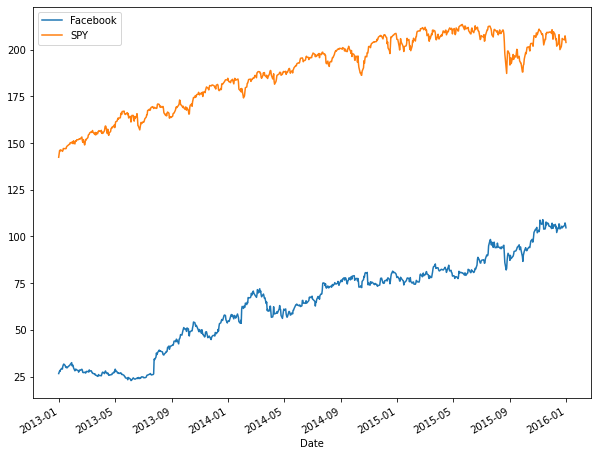

In [5]:
df_fb['Close'].plot(label = 'Facebook', figsize=(10,8))
df_spy['Close'].plot(label = 'SPY')
plt.legend()

## Statistics
As seen from the plot, it seems like the stock performance is mimicking the market performance. So statistically they can be compared. The cumulative returns are found.

In [6]:
df_fb['Cumu'] = df_fb['Close']/df_fb['Close'].iloc[0]
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0]

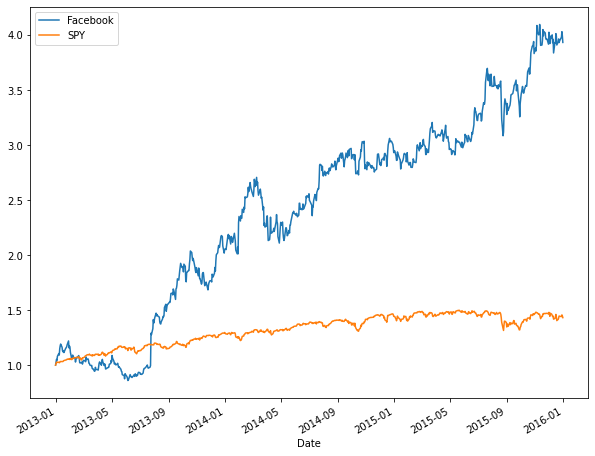

In [7]:
df_fb['Cumu'].plot(label = 'Facebook', figsize=(10,8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

The daily return is also determined.

In [8]:
df_fb['daily_ret'] = df_fb['Close'].pct_change(1)
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

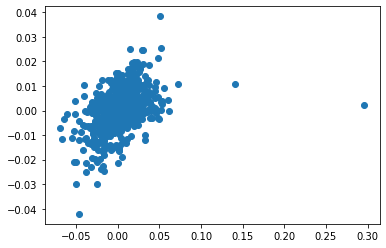

In [9]:
plt.scatter(df_fb['daily_ret'],df_spy['daily_ret'])

The scatter plot indicates that there is some relation between the daily returns of the stock and market.

## Finding alpha and beta values
The alpha and beta value are found by using the stats package of scipy and calling the linear regression function of it. While finding the daily returns, the first row has NaN values and therefore while passing the columns for linear regression everything form the first row is considered.

In [10]:
LR = stats.linregress(df_fb['daily_ret'].iloc[1:],df_spy['daily_ret'].iloc[1:])
LR

LinregressResult(slope=0.14508921572501682, intercept=0.0002066678439426573, rvalue=0.41761756846081083, pvalue=2.8903149350900316e-33, stderr=0.011496201726453189)

The linear regression model is built. It has 5 values which can be obtained through tuple unpacking. The five values are beta, alpha, rvalue, pvalue and standard error.

In [11]:
beta,alpha,r_val,p_val,std_err = LR

In [12]:
beta

0.14508921572501682

In [13]:
alpha

0.0002066678439426573

Take a note that as the CAPM said that alpha is close to zero, it can be seen here too. And the beta value is high if the stock behave just like the market. Therefore the beta value is really low here as there is not much relation between them.